In [38]:
import seaborn as sns
import pandas as pd
import pysal as ps
import json
import numpy as np
from simpledbf import Dbf5
from ipyleaflet import *
!jupyter nbextension enable --py --sys-prefix ipyleaflet

%matplotlib inline

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [39]:
dbf = Dbf5('E:\OTROS\CENSO\DATOS\Datos0.dbf')
df = dbf.to_dataframe()

#data = pd.read_csv('E:\OTROS\CENSO\DATOS\Datos0.dbf',dtype={'U_DPTO': object,'U_MPIO': object,'UA_CLASE': object,'UA2_CPOB': object,'UA1_LOCALIDAD': object,'U_CO': object,'U_AO': object,'U_UC': object})

In [40]:
df.keys()
#data.dtypes
#df['period'] = df[['Year', 'quarter']].apply(lambda x: ''.join(x), axis=1)
#data

Index(['OBJECTID', 'CONCA_AO', 'MAX_CLASE', 'Count_', 'Sum_CNAHog',
       'Sum_CNAViv', 'Sum_CNAPer'],
      dtype='object')

In [41]:
data2 = df.dropna()
data2.head()
#En caso de variables categoricas features = pd.get_dummies(features)

,OBJECTID,CONCA_AO,MAX_CLASE,Count_,Sum_CNAHog,Sum_CNAViv,Sum_CNAPer
0,1,05001100001101101001,1,2,3,7.0,14
1,3,05001100001101101003,1,23,0,9.0,0
2,88,05001100003110110001,1,3,0,2.0,0
3,89,05001100003110110002,1,31,2,15.0,2
4,90,05001100003110110003,1,16,5,16.0,21


In [42]:
data3 = data2.drop(['OBJECTID', 'CONCA_AO'], axis=1)
data3.head()

,MAX_CLASE,Count_,Sum_CNAHog,Sum_CNAViv,Sum_CNAPer
0,1,2,3,7.0,14
1,1,23,0,9.0,0
2,1,3,0,2.0,0
3,1,31,2,15.0,2
4,1,16,5,16.0,21


In [231]:
data3.describe()


,Count_,Sum_CNAHog,Sum_CNAViv,Sum_CNAPer
count,27569.000000,27569.000000,27569.000000,27569.000000
mean,99.681526,51.973448,71.318546,170.702710
std,151.523868,89.549789,112.807850,331.865128
min,1.000000,0.000000,0.000000,0.000000
25%,15.000000,7.000000,12.000000,21.000000
50%,50.000000,26.000000,37.000000,78.000000
75%,122.000000,62.000000,86.000000,194.000000
max,4342.000000,2053.000000,2600.000000,8393.000000


In [ ]:
pd.plotting.scatter_matrix(data3, c=data3['MAX_CLASE'], figsize=(15, 15));

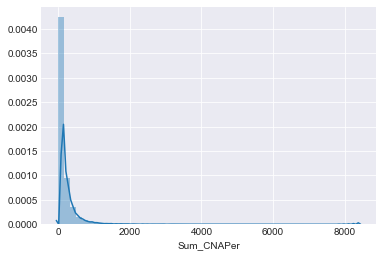

In [209]:
sns.set_style('darkgrid')
sns.distplot(data3['Sum_CNAPer'])

In [ ]:
sns.

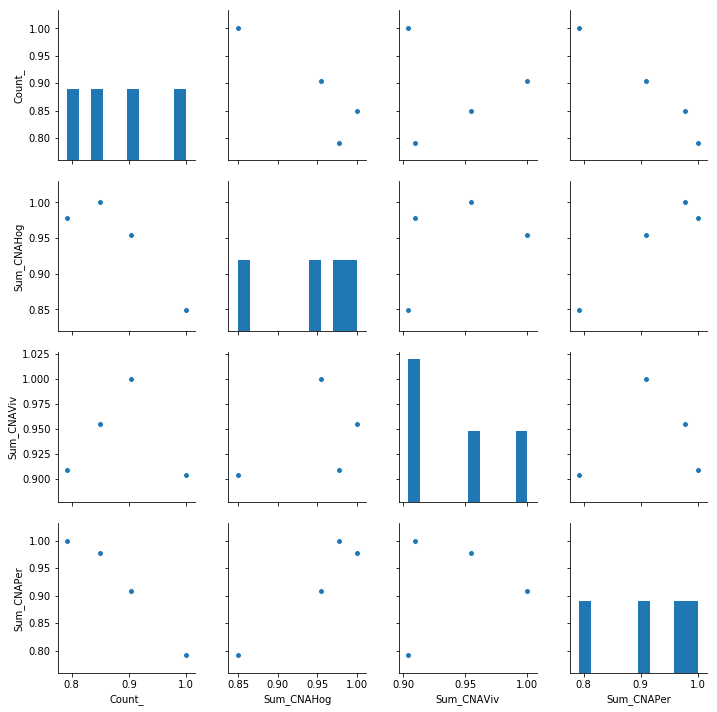

In [45]:
sns.pairplot(data3.corr(),palette='coolwarm') # mapa de color por defecto de matplotlib 

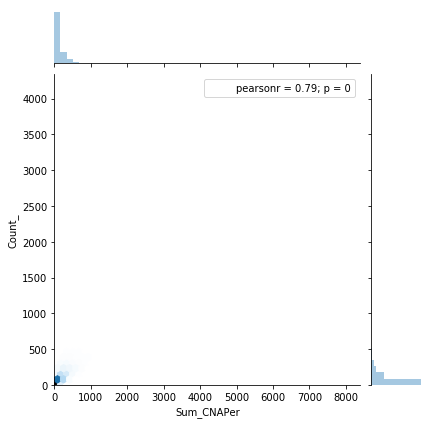

In [47]:
sns.jointplot(x='Sum_CNAPer',y='Count_',data=data3,kind='hex') 

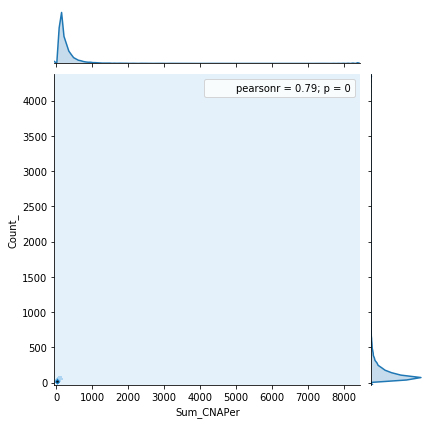

In [48]:
sns.jointplot(x='Sum_CNAPer',y='Count_',data=data3,kind='kde')

In [49]:
Clase = data3.groupby('MAX_CLASE')
Clase.head()
#Clase.dtypes


,MAX_CLASE,Count_,Sum_CNAHog,Sum_CNAViv,Sum_CNAPer
0,1,2,3,7.0,14
1,1,23,0,9.0,0
2,1,3,0,2.0,0
3,1,31,2,15.0,2
4,1,16,5,16.0,21
52,2,120,110,161.0,319
53,2,6,1,7.0,1
54,2,252,66,209.0,197
55,2,365,127,313.0,463
56,2,285,119,266.0,381


In [50]:
# Clase.mean(), Clase.max(), Clase.min()
Clase.describe()
Clase.describe().transpose()
# Clase.describe().transpose()['1'] Para una sola clase

MAX_CLASE                   1            2             3
Count_     count  2668.000000  3757.000000  21144.000000
           mean     24.290480    24.749268    122.508986
           std      74.832316    50.609243    162.908020
           min       1.000000     1.000000      1.000000
           25%       2.000000     2.000000     31.000000
           50%       5.000000     8.000000     71.000000
           75%      17.000000    27.000000    151.000000
           max    2368.000000   960.000000   4342.000000
Sum_CNAHog count  2668.000000  3757.000000  21144.000000
           mean     12.834333    17.157839     63.098373
           std      48.004846    34.541418     97.061580
           min       0.000000     0.000000      0.000000
           25%       0.000000     1.000000     15.000000
           50%       2.000000     5.000000     35.000000
           75%       9.000000    19.000000     75.000000
           max    1806.000000   782.000000   2053.000000
Sum_CNAPer count  2668.000000  3757.000000  21144.000000
           mean     41.367691    56.408571    207.331016
           std     169.903202   118.036794    362.921838
           min       0.000000     0.000000      0.000000
           25%       0.000000     3.000000     44.000000
           50%       6.000000    16.000000    108.500000
           75%      27.000000    60.000000    236.000000
           max    6550.000000  2399.000000   8393.000000
Sum_CNAViv count  2668.000000  3757.000000  21144.000000
           mean     21.423163    24.089433     86.006432
           std      70.427643    48.757971    120.906799
           min       0.000000     0.000000      0.000000
           25%       1.000000     2.000000     22.000000
           50%       4.000000     8.000000     50.000000
           75%      15.000000    27.000000    103.000000
           max    2472.000000   955.000000   2600.000000

In [200]:
# Solo clase 3
data4 = data3[data3['MAX_CLASE'] == '3'][['Count_','Sum_CNAHog','Sum_CNAViv','Sum_CNAPer']]

(21144, 4)

In [192]:
targets= pd.DataFrame(data4['Sum_CNAPer'])
features= pd.DataFrame(data4.drop(['Sum_CNAPer'], axis=1))
#print(targets)

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

scaler = StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

C:\Users\drgalindog\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Random regression

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameter_candidates = {
    'n_estimators' : [650, 700, 750, 800],
    'min_samples_leaf' : [1, 2, 3],
    'max_depth' : [10, 11, 12],
    'min_samples_split' : [2, 3, 4, 5, 6]
}

rf = RandomForestRegressor()
CVrf = GridSearchCV(estimator= rf, param_grid= parameter_candidates, n_jobs=4, verbose=2)
CVrf.fit(X_train, y_train)

pred = CVrf.predict(X_test)
importances = CVrf.best_estimator_.feature_importances_


#RFR_regr = RandomForestRegressor()
#CV_RFR_regr = GridSearchCV(estimator=RFR_regr, param_grid=parameter_candidates, n_jobs=5, verbose=2)
#CV_RFR_regr.fit(X_train, y_train)

#Predict with testing set
#y_pred = CV_RFR_regr.predict(X_test)

#Extract feature importances
#importances = CV_RFR_regr.feature_importances_

#importances = CV_RFR_regr.best_estimator_.feature_importances_


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 10.1min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed: 24.2min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed: 38.2min finished
C:\Users\drgalindog\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [177]:
# Calculate the absolute errors
errors = abs(np.reshape(pred, (4229, 1)) - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'personas')

Mean Absolute Error: Sum_CNAPer    29.08
dtype: float64 personas


In [180]:
# Calculate mean absolute percentage error (MAPE)
mape = 100*(errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: Sum_CNAPer    79.67
dtype: float64 %.


In [203]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = CVrf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [199]:
#from sklearn.metrics import confusion_matrix

from sklearn.metrics import *


print('Explained variance score: {}'.format(explained_variance_score(y_test, pred)))# The best possible score is 1.0, lower values are worse.
print('R^2: {}'.format(r2_score(y_test, pred,multioutput='uniform_average')))
print('Mean Absolute Error (MAE): {}'.format(mean_absolute_error(y_test, pred)))
print('Mean Squared Error (MSE): {}'.format(mean_squared_error(y_test, pred)))
print('Mean squared logarithmic error (MSLE): {}'.format(mean_squared_log_error(y_test, pred))) #function computes a risk metric corresponding to the expected value of the squared logarithmic (quadratic) error or loss.
print('MedSE: {}'.format(median_absolute_error(y_test, pred)))

Explained variance score: 0.9553659490570537
R^2: 0.9553613186561881
MAE: 29.07723363167651
MSE: 5514.417511408962
MSLE: 0.05574554798174477
MedSE: 12.336000173501432


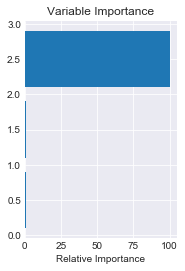

In [233]:
# #############################################################################
# Plot feature importance
# make importances relative to max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [190]:
m= Map(center=[4,-72], zoom = 5)
left = basemap_to_tiles(basemaps.HikeBike.HikeBike)
right = basemap_to_tiles(basemaps.Hydda.Full)
control = SplitMapControl(left_layer=left, right_layer=right)
m.add_control(control)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[4, -72], controls=(SplitMapControl(left_layer=TileLayer(attribution='&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a>', max_zoom=19, min_zoom=1, name='HikeBike.HikeBike', options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size'], url='http://{s}.tiles.wmflabs.org/hikebike/{z}/{x}/{y}.png'), right_layer=TileLayer(attribution='Tiles courtesy of <a href="http://openstreetmap.se/" target="_blank">OpenStreetMap Sweden</a> &mdash; Map data &copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a>', min_zoom=1, name='Hydda.Full', options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size'], url='http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png')),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']),), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'interpolation', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=5)

In [191]:
from ipyleaflet import *
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


## Gradient boosting

In [232]:
from sklearn import ensemble
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [229]:
gbrt =  ensemble.GradientBoostingRegressor(n_estimators=100)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_test)
#See more at: https://shankarmsy.github.io/stories/gbrt-sklearn.html#sthash.KiW2Vyln.dpuf

C:\Users\drgalindog\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'
            
            

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

In [241]:
#https://shankarmsy.github.io/stories/gbrt-sklearn.html#sthash.dTnGNZIz.dpuf

def GradientBooster(param_grid, n_jobs):
    
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print ("Best Estimator learned through GridSearch")
    print (classifier.best_estimator_)
    return (cv, classifier.best_estimator_)



In [238]:
param_grid={'n_estimators':[100], 'learning_rate': [0.1],# 0.05, 0.02, 0.01],
            'max_depth':[6],#4,6], 
            'min_samples_leaf':[3],#,5,9,17], 
            'max_features':[1.0],#,0.3]#,0.1] 
           } 

njobs = 4
cv,best_est=GradientBooster(param_grid, njobs) 
            

NameError: name 'GradientBoostingRegressor' is not defined